## Load Libraries 

In [1]:
library("rcompanion")
library("car")
library("IDPmisc")
library("dplyr")

Loading required package: carData


Attaching package: ‘dplyr’


The following object is masked from ‘package:car’:

    recode


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## Load Data

In [3]:
suicide <- read.csv("/Users/kenyashiafernandez/Downloads/suicide.csv")

##  Number of suicides by generation by country, with country being the repeated factor

## Assumptions

### Normality

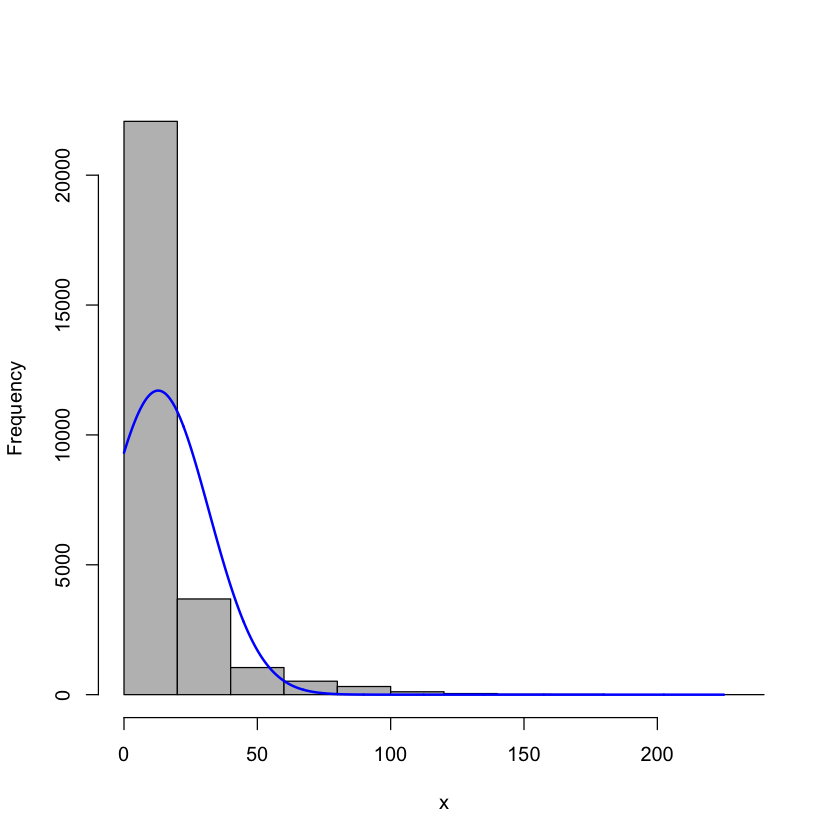

In [4]:
plotNormalHistogram(suicide$suicides.100k.pop)

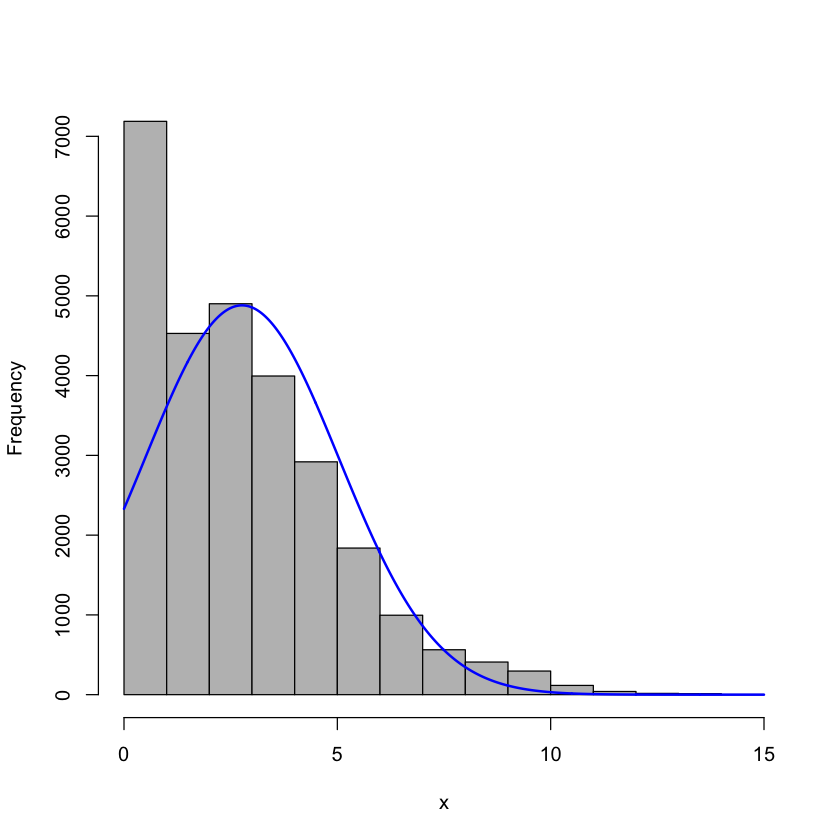

In [5]:
suicide$suicides.100k.popSQRT <- sqrt(suicide$suicides.100k.pop)
plotNormalHistogram(suicide$suicides.100k.popSQRT)

In [6]:
suicide$suicides.100k.popLOG <- log(suicide$suicides.100k.pop)

In [7]:
suicide4 <- NaRV.omit(suicide)

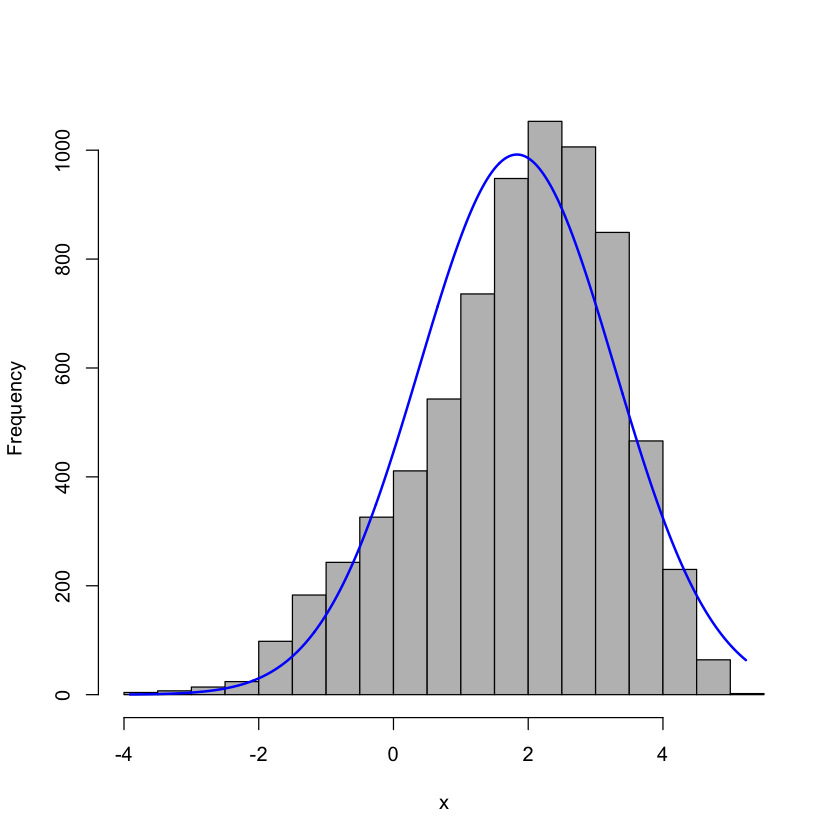

In [8]:
plotNormalHistogram(suicide4$suicides.100k.popLOG)

## Homogeneity of Varience

In [9]:
leveneTest(suicides.100k.popLOG ~ generation, data=suicide4)

Warning message in leveneTest.default(y = y, group = group, ...):
“group coerced to factor.”


Df   F value  Pr(>F)      
group    5 18.17709 5.712815e-18
      7201       NA           NA

## Run Analysis

In [10]:
RManova1 <- aov(suicides.100k.popLOG~(generation*year)+Error(ï..country/(year)), suicide4)
summary(RManova1)

ERROR: Error in eval(predvars, data, env): object 'ï..country' not found


## Post Hocs

In [11]:
pairwise.t.test(suicide4$suicides.100k.popLOG, suicide4$generation, p.adjust="bonferroni")


	Pairwise comparisons using t tests with pooled SD 

data:  suicide4$suicides.100k.popLOG and suicide4$generation 

                Boomers G.I. Generation Generation X Generation Z Millenials
G.I. Generation 6.5e-16 -               -            -            -         
Generation X    1.2e-13 < 2e-16         -            -            -         
Generation Z    < 2e-16 < 2e-16         < 2e-16      -            -         
Millenials      < 2e-16 < 2e-16         < 2e-16      < 2e-16      -         
Silent          1.2e-05 2.0e-05         < 2e-16      < 2e-16      < 2e-16   

P value adjustment method: bonferroni 

In [12]:
## suicideMeans <- suicide4 %>% group_by(generation, year) %>% summarize(Mean=mean(suicides.100k.pop))